## SLU17 - Ethics & Fairness - Exercise notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import hashlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%matplotlib inline
plt.rcParams["figure.figsize"]=(3.5,3.5)

import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

from utils.utils import make_data

## Criminal justice bias

Exercise adaptated from the book [Fairness and Machine Learning by Solon Barocas, Moritz Hardt, and Arvind Narayanan](https://fairmlbook.org/pdf/fairmlbook.pdf).

Based on the ProPublica's article [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) about a proprietary risk score algorithm, called COMPAS, used in the US.

This is the problem setting:

> Risk assessment is an important component of the criminal justice system. In the United States, judges set bail and decide pre-trial detention based on their assessment of the risk that a released defendant would fail to appear at trial or cause harm to the public.

These scores are intended to assess the risk that a defendant will re-offend, a task often called **recidivism prediction**.

We’ll use data obtained and released by ProPublica.

In [2]:
data = make_data()
data.head()

,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid
0,Male,69,Greater than 45,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0
1,Male,34,25 - 45,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1
2,Male,24,Less than 25,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1
5,Male,44,25 - 45,Other,1,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,M,0,Low,0
6,Male,41,25 - 45,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,1


## Exercise 1 - Score distribution for Black and White defendants

In this exercise, we will compare the predicted `decile_score` distributions for different races. This is the score predicted by the COMPAS algorithm. High score means a high risk of reoffending. 

In the three cells below, plot the histograms of the `decile_score` for all defendants, for the Black defendants - `African-American` race, and for White defendants - `Caucasian` race. Suggestion: use the `histtype='step'` option.

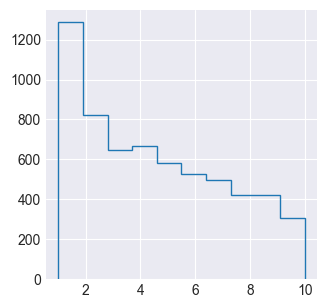

In [4]:
# Plot here the decile_score histogram for all defendants.
# YOUR CODE HERE
data.decile_score.hist(histtype="step");

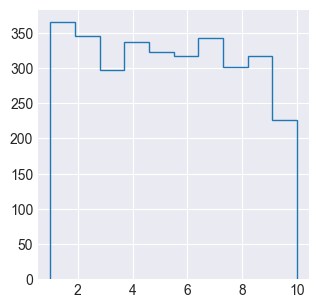

In [14]:
# Plot here the decile_score histogram for the Black defendants.
# YOUR CODE HERE
data[data.race=="African-American"].decile_score.hist(histtype="step");

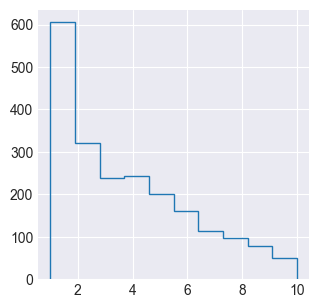

In [15]:
# Plot here the decile_score histogram for the White defendants.
# YOUR CODE HERE
data[data.race=="Caucasian"].decile_score.hist(histtype="step");

### Interpretation

Based on these plots, what would you conclude from the distributions? Uncomment the correct answer.

In [7]:
# hypothesis_1 = 'The distributions of the scores are similar for the Black and White populations.'
# hypothesis_1 = 'Scores for White defendants are skewed toward lower-risk categories.'
# hypothesis_1 = 'Scores for Black defendants are skewed toward lower-risk categories.'

# YOUR CODE HERE
hypothesis_1 = 'Scores for White defendants are skewed toward lower-risk categories.'

In [8]:
assert hashlib.sha256(str(hypothesis_1).encode('utf-8')).hexdigest() == 'c9502425519f2a2ab1389f934ac42ccff095b92497a25ea8067e1eaffa704fbd', 'Not correct.'

## Exercise 2 - Error rates

In this exercise, we will compare the predicted `decile_score` of people who have reoffended within a two-year period across the races. The reoffension is indicated in the column `two_year_recid`, 1 means reoffension.

In the three cells below, plot the histograms of the `decile_score` for all reoffenders, for the Black reoffenders - `African-American` race, and for White reoffenders - `Caucasian` race. Suggestion: use the `histtype='step'` option.

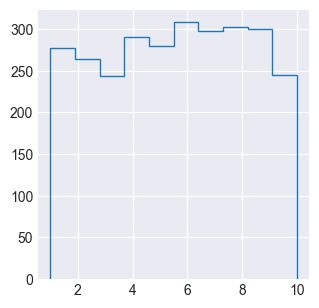

In [10]:
# Plot here the decile_score histogram for all reoffenders.
# YOUR CODE HERE
data[data.two_year_recid==1].decile_score.hist(histtype="step");

<Axes: >

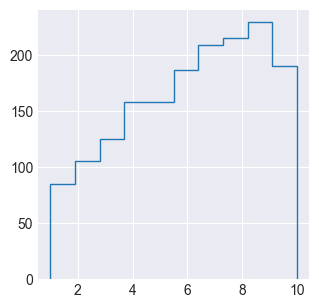

In [11]:
# Plot here the decile_score histogram for Black reoffenders.
# YOUR CODE HERE
data[(data.two_year_recid==1)&(data.race=="African-American")].decile_score.hist(histtype="step")

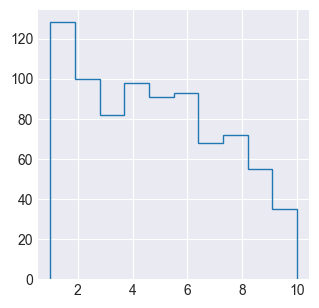

In [13]:
# Plot here the decile_score histogram for White reoffenders.
# YOUR CODE HERE
data[(data.two_year_recid==1)&(data.race=="Caucasian")].decile_score.hist(histtype="step");

## Interpretation

Overall, the risk score doesn't appear to be particularly good at separating recidivists. The resulting histogram for all reoffenders resembles a uniform distribution.

Based on these plots, uncomment the correct answer. (Remember, these histograms report to **actual recidivists**.) 

In [16]:
# hypothesis_2 = 'The distribution of recidivists scores is similar for both races groups.'
# hypothesis_2 = 'Scores for White recidivists are skewed toward lower-risk categories.'
# hypothesis_2 = 'Scores for Black recidivists are skewed toward lower-risk categories.'

# YOUR CODE HERE
hypothesis_2 = 'Scores for White recidivists are skewed toward lower-risk categories.'

In [17]:
assert hashlib.sha256(str(hypothesis_2).encode('utf-8')).hexdigest() == 'c0c2fcf934d80486aa2f4a469c5ddaf8ee08784a4b37595eb64acd8039b217b7', 'Not correct.'

## Exercise 3 - When predictions fail differently

Defendants with `decile_score` higher than 3 are classified as being at high-risk of recidivism. In this exercise, we will compare the predictions for high-risk of recidivism across the races.

In the cells below, calculate the false positive rate (FPR) for predictions of high-risk of recidivism for all people, for Black people - `African-American` race, and for White people - `Caucasian` race.

Recall that the false positive rate, also known as the probability of false alarm, is given by:

$$FPR = \frac{FP}{FP + TN} = \frac{FP}{N}$$

Where $FP$ is the number of false positives, $TN$ is the number of true negatives, and $N$ the total number of negatives. You can use the `confusion_matrix` function to calculate the true/false positives/negatives.

In [18]:
# Calculate here the FPR for all people predicted at high-risk of recidivism.
# fpr = ...
# YOUR CODE HERE
y_true = data['two_year_recid']
y_pred = data['decile_score'] > 3

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

fpr = fp / (fp + tn)

In [19]:
# Calculate here the FPR for Black people predicted at high-risk of recidivism.
# fpr_b = ...
# YOUR CODE HERE
y_true_b = data[data.race=="African-American"]["two_year_recid"]
y_pred_b = data[data.race=="African-American"]["decile_score"]>3

tn, fp, fn, tp = confusion_matrix(y_true_b, y_pred_b).ravel()
fpr_b = fp / (fp + tn)

In [20]:
# Calculate here the FPR for all White predicted at high-risk of recidivism.
# fpr_w = ...
# YOUR CODE HERE
y_true_w = data[data.race=="Caucasian"]["two_year_recid"]
y_pred_w = data[data.race=="Caucasian"]["decile_score"]>3

tn, fp, fn, tp = confusion_matrix(y_true_w, y_pred_w).ravel()
fpr_w = fp / (fp + tn)

In [21]:
assert np.isclose(fpr, 0.41, atol=0.01)
assert np.isclose(fpr_b, 0.54, atol=0.01)
assert np.isclose(fpr_w, 0.33, atol=0.01)

In [22]:
print(f'Overall FPR is {round(fpr,2)}, FPR for Black people is {round(fpr_b,2)}, and FPR for White people is {round(fpr_w,2)}.')

Overall FPR is 0.41, FPR for Black people is 0.54, and FPR for White people is 0.33.


Clearly, Black people are disproportionately more often falsely predicted to be at high-risk of recidivism than White people.